# Air Pollution in India
### Exploring the role of seasonal changes on air quality
### By Siddhant Das 
### github.com/Sid-26

## Introduction
Air pollution in India is a severe environmental issue. In 2019, 21 out of the 30 most polluted cities were from India. Some factors contributing to this are industrial pollution and car pollution. Another cause is stubble burning, also known as crop burning. This is a practice where after the harvest, the stems, also known as "stubble," is burnt because it is considered crop waste. This issue became so severe that in 2015, the government of India launched the National Air Quality Index (NAQI) to monitor air quality as part of the National Air Monitoring Program (NAMP). The Central Pollution Control Board is the governing body responsible for NAMP and implicitly monitoring NAQI.[1]

This notebook is a data science report assignment where we explore the relationship of air quality with respect to changes in seasons (time). The data set is about air quality in India from 2015 and 2020. This particular data set is about the city's daily average air quality. The **research question** that is to be explored is stated below the images.

![Image of Stubble Burning](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/NP_India_burning_48_%286315309342%29.jpg/640px-NP_India_burning_48_%286315309342%29.jpg)
Image of Stubble burning by Neil Palmer, Creative Common Attribution from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:NP_India_burning_48_(6315309342).jpg)

![Image of Industrial Air Pollution](https://upload.wikimedia.org/wikipedia/commons/9/93/Satpura_thermal_power_plant.jpg?20110910054308)
Image of thermal power plant by Ashish.prajapati90,  Creative Common Attribution from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Satpura_thermal_power_plant.jpg)

### Research Question
**How is Air Quality Index affected with respect to the change in seasons (time)?**

## Data Preparation


### Background
Government agencies use Air Quality Index (AQI) as a measure of air pollution to communicate to the public how polluted the air is. A low number indicates less polluted air and vice versa. Furthermore, AQI is split into categories called AQI buckets based on ranges of values. AQI is measured at a station which measures hourly, and there are eight pollutants which are measured, including particulate matter of 2.5 (PM2.5 - matter of diameter of 2.5 micrometers or fewer) and PM10 (matter of 10 micrometers or fewer). For calculating a valid AQI daily average, as per CPCB regulations, there must be data for at least three pollutants, out of which one of them at least has to be PM2.5 OR PM10. Moreover, there must be at least 16 hours of data in a 24-hour run. If all the conditions are not met, AQI is not calculated or considered invalid. This data set contains daily averages for cities which have multiple stations. Therefore, the city's daily AQI is by taking the average of all stations in the city whose daily averages are also calculated.[2]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

sns.set_theme()

## Methods

### Collecting the data
The data has been compiled on [Kaggle](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india).[3] The original data has been made accessible by the Central Pollution Control Board of India ([CPCB](https://cpcb.nic.in/)).[3]

In [2]:
# Reading data from CSV file to pandas dataframe
df = pd.read_csv("Data/city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## Cleaning the data
The data set looks like this as indicated by the head values above. It's clear that it requires a lot of cleaning because of so many missing values. Further, we can detect missing values with the missingno library.

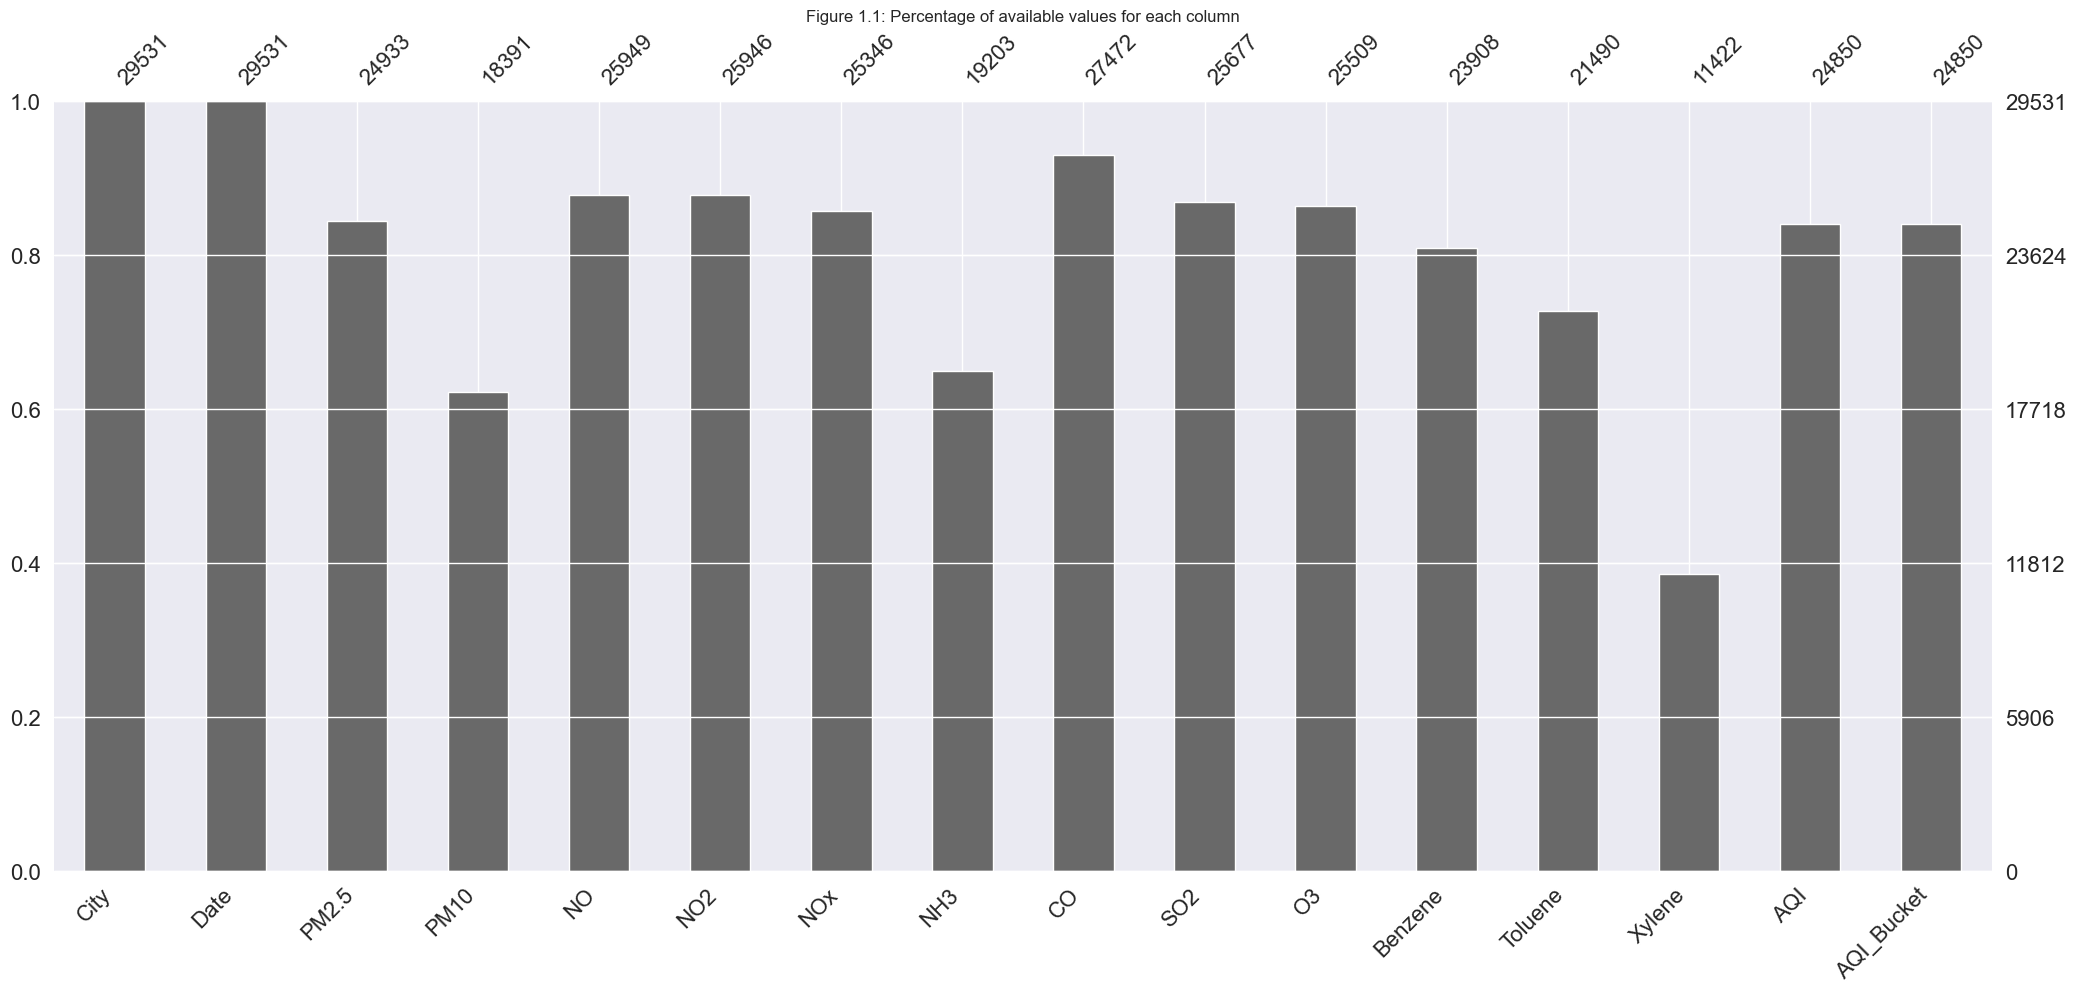

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [3]:
mn.bar(df)
plt.title('Figure 1.1: Percentage of available values for each column')
plt.show()
df.isna().sum()

The above graph (where the y-axis represent data availability (0 means all data is NaN and 1 means all data is available for all rows) and x-axis represents columns of dataset)and the corresponding table which shows how many NaN values exists for each column. This supports the shape of the graph of data set in terms of missing value and this will help in cleaning. Since we can drop all values without an AQI value as explained in the background.

In [4]:
df = df[df['AQI'].isna()==False]
df.isna().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [5]:
df['City'].value_counts()

Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: City, dtype: int64

Since the above data shows that data set contains a lot of cities. We
will only work with the top 5 because we want the maximum amount of data points to measure changes over time

In [6]:
df = df[df['City'].str.contains("Delhi|Bengaluru|Lucknow|Chennai|Hyderabad")]

Removing rows NaN values on the condition of NaN in PM2.5 AND PM10 as AQI is invalid without at least one of these as explained in background and removing all rows with less than 3 pollutants

In [7]:
df = df[~df[['PM2.5', 'PM10']].isna().all(axis=1)]
df = df.dropna(subset=df.columns.difference(['City','Date','PM2.5','PM10','AQI','AQI_Bucket']),how='all')
df['City'].value_counts() # shows counts of all data points corresponding to city

Delhi        1998
Bengaluru    1909
Lucknow      1891
Chennai      1878
Hyderabad    1877
Name: City, dtype: int64

We want to analyse air quality with respect to time, so we are gonna setup date and break it down into months, days and years. First we convert Date into a datetime data type for pandas, and then we break it down into those columns.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.reset_index()
df = df.drop('index', axis=1)

Now, we should validate AQI and days by checking if the count is equal.

In [9]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
count,9497.000000,5504.000000,9551.000000,9551.000000,9246.000000,7803.000000,9536.000000,9452.000000,9337.000000,8926.000000,9061.000000,2987.000000,9553.000000,9553.000000,9553.000000,9553.000000
mean,72.814051,137.236139,16.349884,31.837152,28.317461,35.002215,1.413991,9.260758,37.585442,2.276949,7.681212,1.607690,160.311106,15.733173,6.378206,2017.370774
std,66.250736,106.037817,21.340089,20.282882,26.994465,32.758635,2.288036,6.734123,20.532518,7.404219,13.591414,2.704528,107.755488,8.819263,3.408694,1.574395
min,1.720000,0.210000,0.110000,0.620000,0.000000,0.020000,0.000000,0.710000,0.100000,0.000000,0.000000,0.000000,20.000000,1.000000,1.000000,2015.000000
25%,32.330000,66.332500,5.975000,16.500000,12.600000,15.800000,0.660000,5.070000,23.730000,0.280000,1.020000,0.160000,83.000000,8.000000,4.000000,2016.000000
50%,51.400000,102.510000,9.280000,27.000000,20.505000,27.550000,0.960000,7.140000,33.970000,1.070000,3.090000,0.660000,119.000000,16.000000,6.000000,2017.000000
75%,83.880000,167.675000,16.045000,42.070000,33.395000,41.395000,1.380000,11.130000,47.480000,2.520000,8.720000,1.940000,207.000000,23.000000,9.000000,2019.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,352.890000,48.070000,71.560000,257.730000,391.880000,411.520000,28.240000,737.000000,31.000000,12.000000,2020.000000


One last time, let's how the missing value distribution (AQI == 1.0 must be true) looks like:

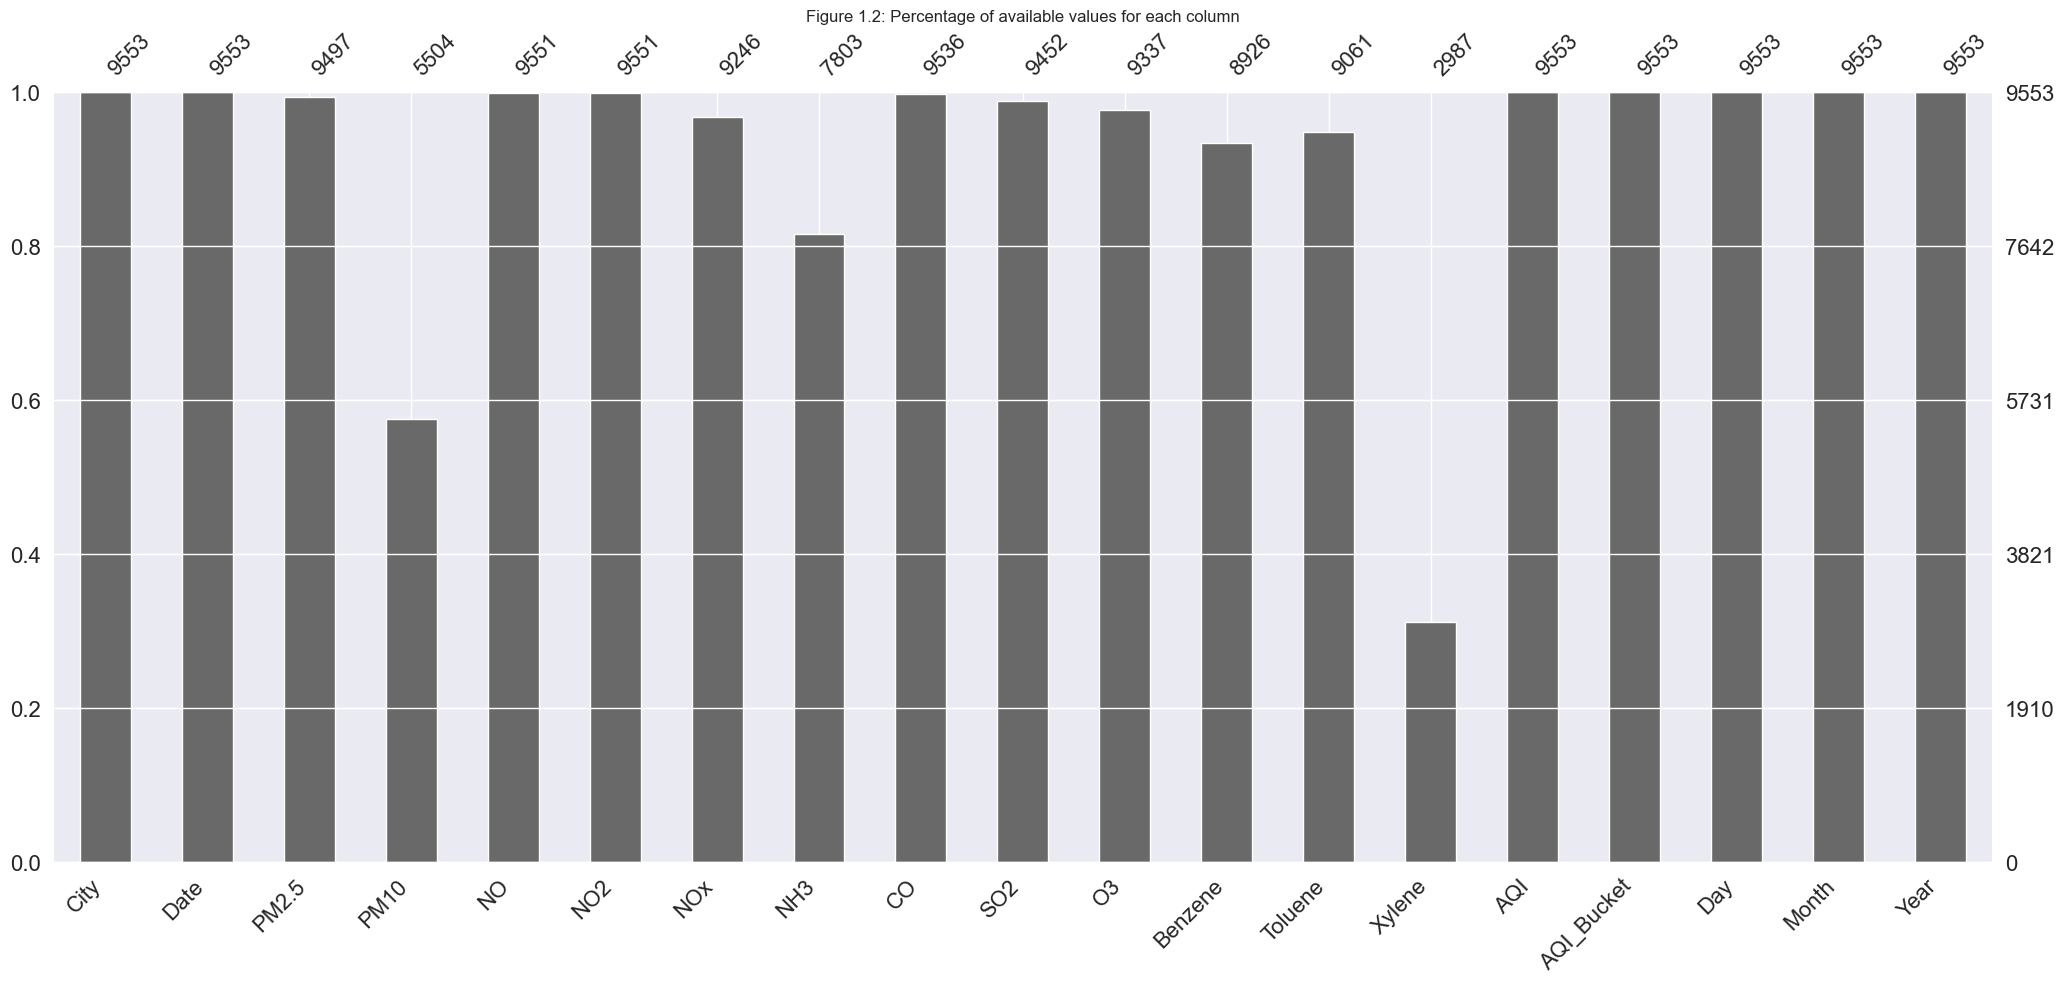

In [10]:
mn.bar(df)
plt.title('Figure 1.2: Percentage of available values for each column')
plt.show()

In [11]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,91.0,Satisfactory,21,3,2015
1,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,120.0,Moderate,22,3,2015
2,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,154.0,Moderate,23,3,2015
3,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,119.0,Moderate,24,3,2015
4,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,232.0,Poor,25,3,2015


As we can see from the graph, the data has been cleaned and the dates has been parsed and organized into more usuable data. This means that we can start with the analysis of the data.

## Analyses

### Distribution of data
We will begin by seeing the distribution of AQI for all the cities from 2015 to 2020.

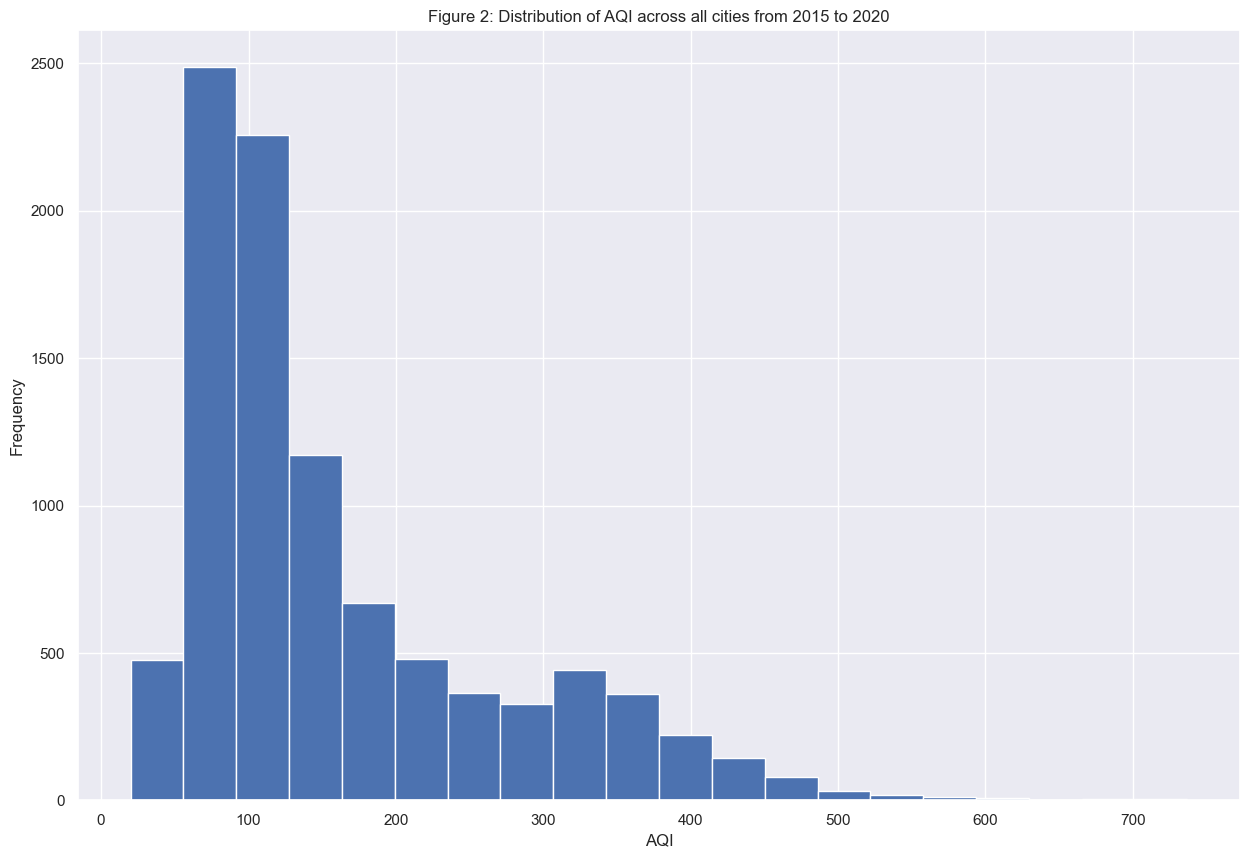

In [12]:
df['AQI'].hist(bins=20,figsize=(15,10)).set(ylabel='Frequency',xlabel='AQI',title='Figure 2: Distribution of AQI across all cities from 2015 to 2020')
plt.show()

In [13]:
des = df['AQI'].describe()
print(f'Mean AQI: {des["mean"].round(2)}')
print(f'Min AQI: {des["min"].round(2)}')
print(f'Max AQI: {des["max"].round(2)}')

Mean AQI: 160.31
Min AQI: 20.0
Max AQI: 737.0


This shows that the distribution is right skewed where the majority of AQI is around 80 to 160 range. Which is considered satisfactory to moderate in the AQI bucket. To understand this distribution better, we can do a breakdown of all the mean values by City.

        City     AQI
0  Bengaluru   94.35
1  Hyderabad  109.21
2    Chennai  114.56
3    Lucknow  218.16
4      Delhi  259.60


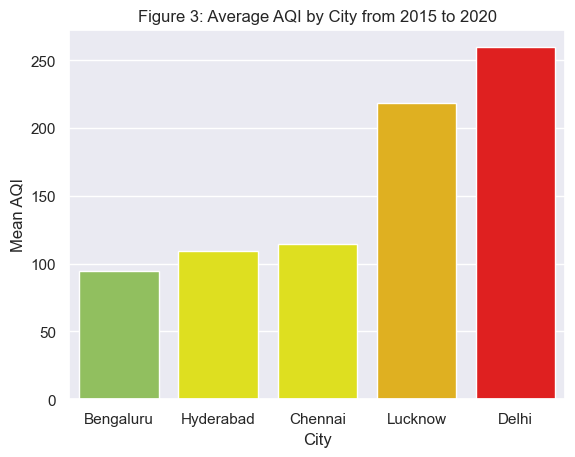

In [14]:
cityMeanAQI = df[['City','AQI']].groupby('City').mean().sort_values(['AQI']).round(2).reset_index()
print(cityMeanAQI)

custom_palette = {}
for index in cityMeanAQI.City:
    val = cityMeanAQI[cityMeanAQI.City == index]['AQI'].values
    if val <= 50:
        custom_palette[index] = '#00B050'
    elif val <= 100:
        custom_palette[index] = '#91CF4F'
    elif val <= 200:
        custom_palette[index] = '#FEFF00'
    elif val <= 250:
        custom_palette[index] = '#FFC001'
    elif val > 250:
        custom_palette[index] = '#FF0000'
    else:
        custom_palette[index] = '#FFFFFF'

sns.barplot(x='City',y='AQI',data=cityMeanAQI,palette=custom_palette).set(ylabel='Mean AQI',title='Figure 3: Average AQI by City from 2015 to 2020')

plt.show()

To understand why certain cities are have a higher AQI than other cities. We can break it down by looking at the AQI buckets for each city (Bengaluru, Chennai, Delhi, Hyderabad and Lucknow).

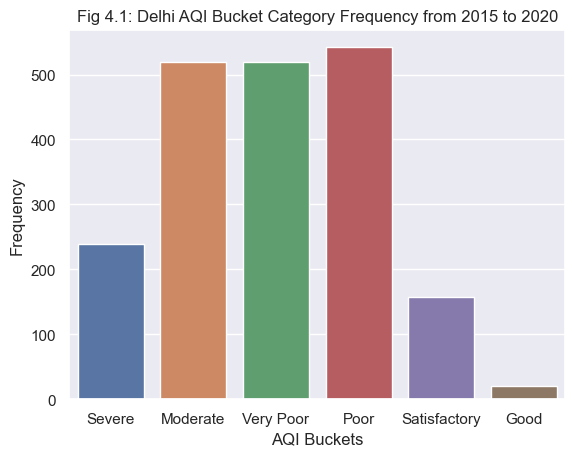

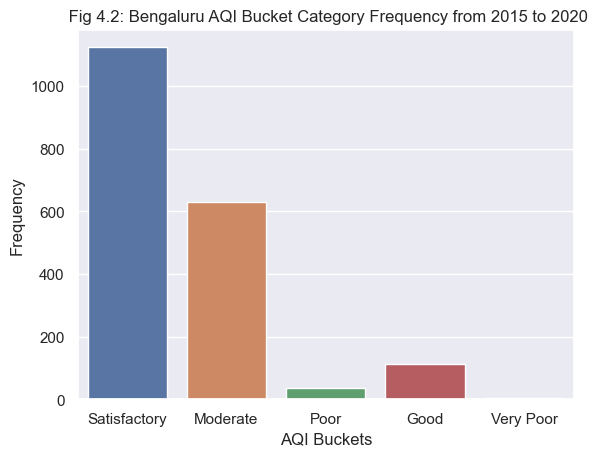

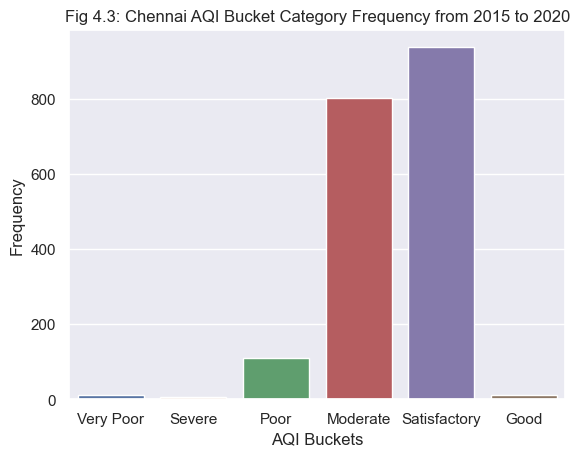

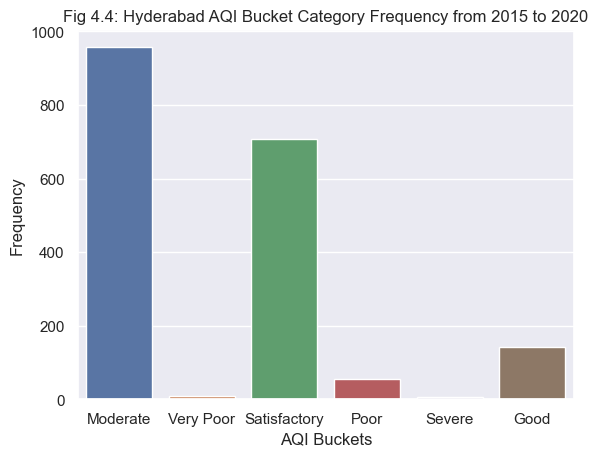

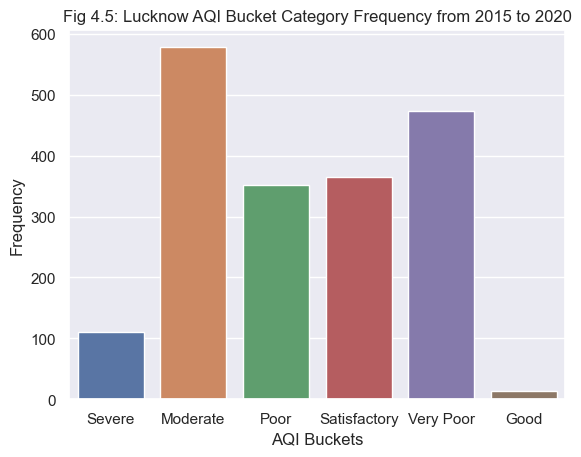

In [15]:
delhiAQIBucketList = df.loc[(df['City'] == 'Delhi')]
bengaluruAQIBucketList = df.loc[(df['City'] == 'Bengaluru')]
chennaiAQIBucketList = df.loc[(df['City'] == 'Chennai')]
hyderabadAQIBucketList = df.loc[(df['City'] == 'Hyderabad')]
lucknowAQIBucketList = df.loc[(df['City'] == 'Lucknow')]

sns.countplot(x="AQI_Bucket",data=delhiAQIBucketList).set(xlabel="AQI Buckets",ylabel="Frequency",title="Fig 4.1: Delhi AQI Bucket Category Frequency from 2015 to 2020")
plt.show()
sns.countplot(x="AQI_Bucket",data=bengaluruAQIBucketList).set(xlabel="AQI Buckets",ylabel="Frequency",title=" Fig 4.2: Bengaluru AQI Bucket Category Frequency from 2015 to 2020")
plt.show()
sns.countplot(x="AQI_Bucket",data=chennaiAQIBucketList).set(xlabel="AQI Buckets",ylabel="Frequency",title="Fig 4.3: Chennai AQI Bucket Category Frequency from 2015 to 2020")
plt.show()
sns.countplot(x="AQI_Bucket",data=hyderabadAQIBucketList).set(xlabel="AQI Buckets",ylabel="Frequency",title="Fig 4.4: Hyderabad AQI Bucket Category Frequency from 2015 to 2020")
plt.show()
sns.countplot(x="AQI_Bucket",data=lucknowAQIBucketList).set(xlabel="AQI Buckets",ylabel="Frequency",title="Fig 4.5: Lucknow AQI Bucket Category Frequency from 2015 to 2020")
plt.show()

As shown in figures 4.x charts above, we can say Delhi is the most air polluted city, whereas Bengaluru is the least air polluted. This also indicates that northern parts of tend to more air polluted than southern parts of India as shown by these cities. There are numerous factors and complex systems as to why geography plays a role in this.

### Time Analysis of data
In the introduction we posed a question and that is to determine whether seasonal change patterns and air quality have a relationship. This section aims to just that. First we will look at monthly means for every year in the data set (2015 to 2020).

In [16]:
def cityMeanAQIByYear(df,year: int): # creating a function to separate the dataframe by year and group by city and month to find the mean
    d = df.loc[df['Year'] == year]
    d = d[['City','AQI','Month']].reset_index()
    d.drop('index',axis=1,inplace=True)
    d = d.groupby(["Month","City"],as_index=False).agg({"AQI":"mean"})
    return d

cityMeanAQIMonthly2020 = cityMeanAQIByYear(df,2020)
cityMeanAQIMonthly2019 = cityMeanAQIByYear(df,2019)
cityMeanAQIMonthly2018 = cityMeanAQIByYear(df,2018)
cityMeanAQIMonthly2017 = cityMeanAQIByYear(df,2017)
cityMeanAQIMonthly2016 = cityMeanAQIByYear(df,2016)
cityMeanAQIMonthly2015 = cityMeanAQIByYear(df,2015)

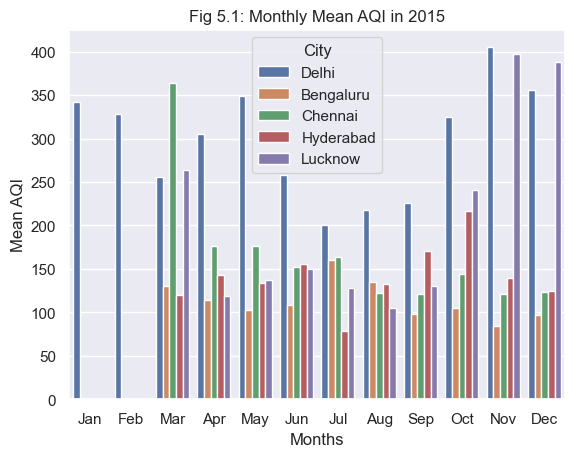

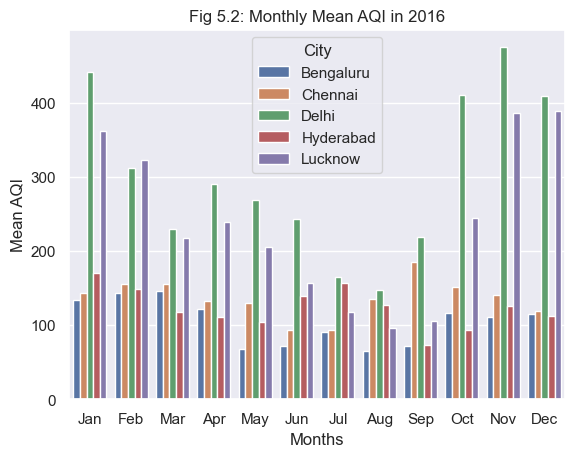

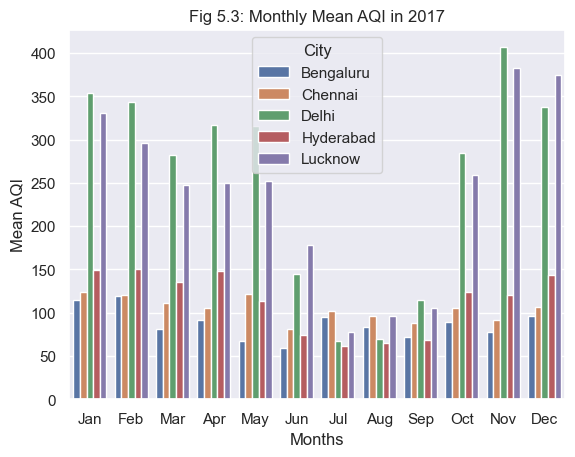

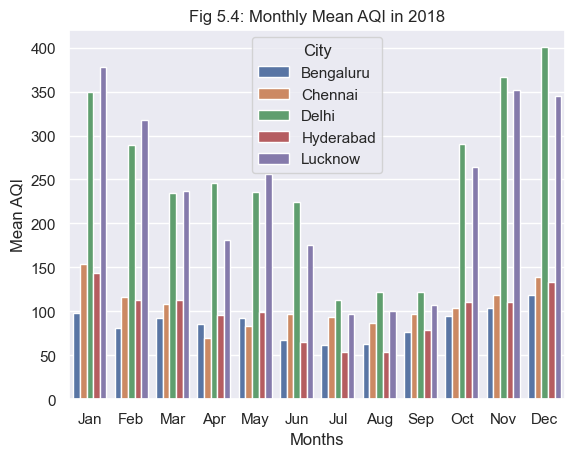

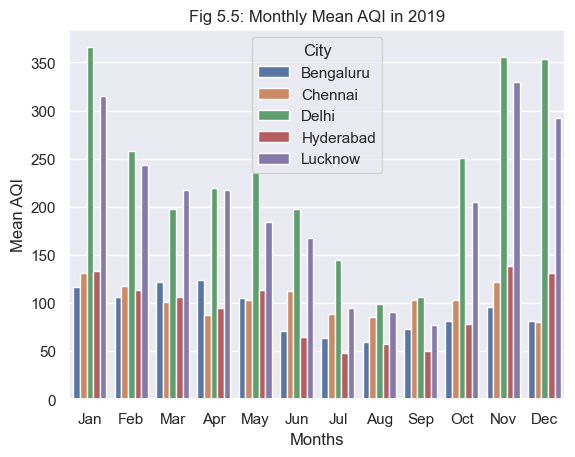

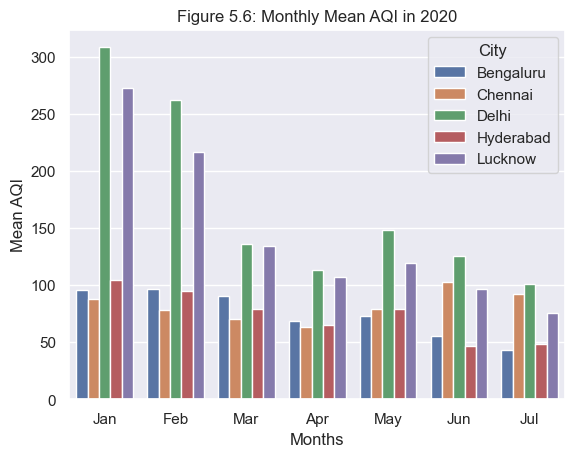

In [17]:
sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2015).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Fig 5.1: Monthly Mean AQI in 2015')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2016).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Fig 5.2: Monthly Mean AQI in 2016')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2017).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Fig 5.3: Monthly Mean AQI in 2017')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2018).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Fig 5.4: Monthly Mean AQI in 2018')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2019).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],xlabel='Months',ylabel='Mean AQI',title='Fig 5.5: Monthly Mean AQI in 2019')
plt.show()

sns.barplot(x='Month',y='AQI',hue='City',data=cityMeanAQIMonthly2020).set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul'],xlabel='Months',ylabel='Mean AQI',title='Figure 5.6: Monthly Mean AQI in 2020')
plt.show()

From the above graphs we can see that there seems to be a pattern in this, where overall means seem to be the lowest around the summer months and the highest around the winter months, there seems to be a periodic pattern to do this. To confirm this suspicion, we can make a time series graph of each city from 2015 to 2020 for every single day.

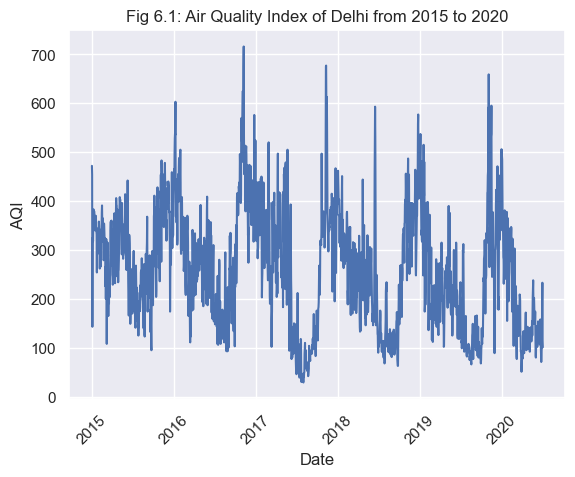

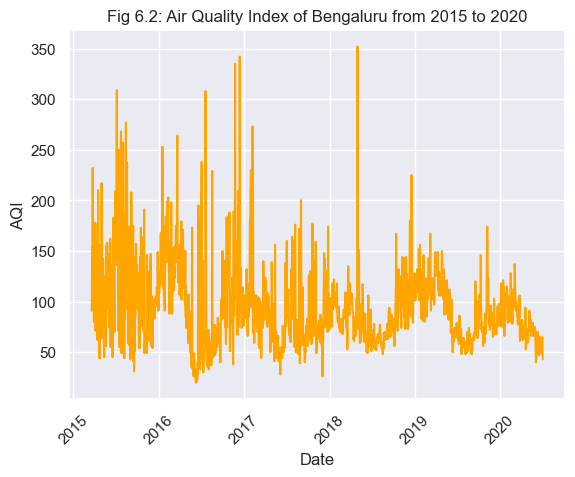

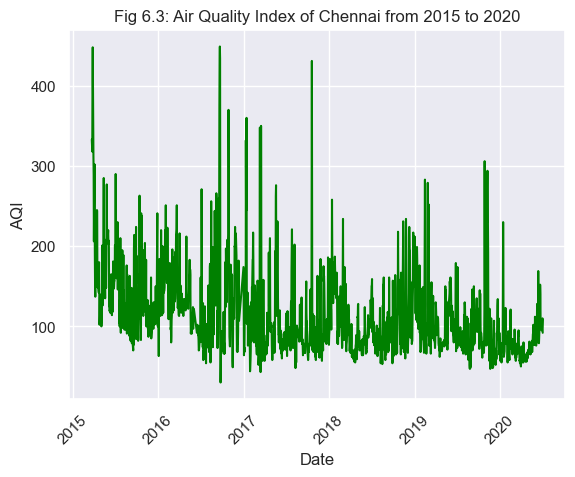

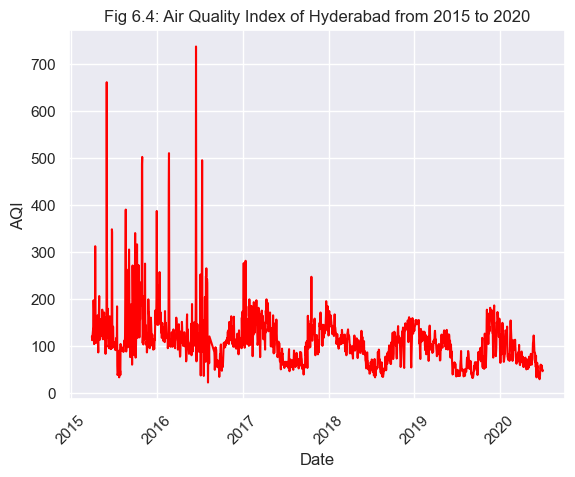

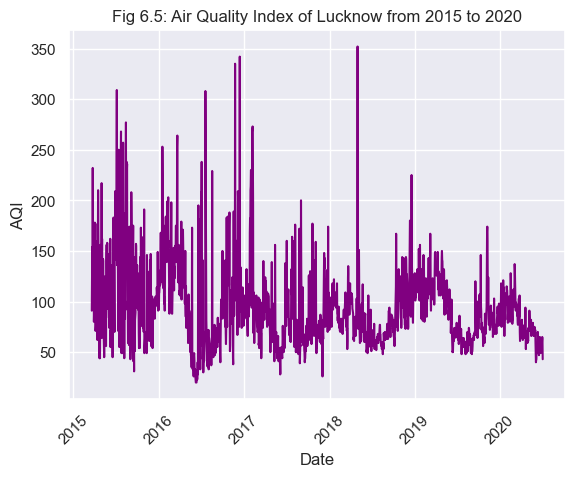

In [18]:
delhiTime = df.loc[df['City'] == 'Delhi']
bengTime = df.loc[df['City'] == 'Bengaluru']
chenTime = df.loc[df['City'] == 'Chennai']
hydeTime = df.loc[df['City'] == 'Hyderabad']
luckTime = df.loc[df['City'] == 'Bengaluru']

sns.lineplot(data=delhiTime, x=delhiTime.Date, y='AQI').set(title='Fig 6.1: Air Quality Index of Delhi from 2015 to 2020',xlabel='Date')
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=bengTime, x=bengTime.Date, y='AQI',color='orange').set(title='Fig 6.2: Air Quality Index of Bengaluru from 2015 to 2020',xlabel='Date',)
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=chenTime, x=chenTime.Date, y='AQI',color='green').set(title='Fig 6.3: Air Quality Index of Chennai from 2015 to 2020',xlabel='Date',)
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=hydeTime, x=hydeTime.Date, y='AQI',color='red').set(title='Fig 6.4: Air Quality Index of Hyderabad from 2015 to 2020',xlabel='Date',)
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=luckTime, x=luckTime.Date, y='AQI',color='purple').set(title='Fig 6.5: Air Quality Index of Lucknow from 2015 to 2020',xlabel='Date',)
plt.xticks(rotation=45)
plt.show()

From the above time series graphs, we can see that in fact there is a pattern between seasonal changes (time) and air quality. It's almost sinusoidal. But to really confirm whether there is a proper different between seasons, we will look at box plots of cities in the year 2019 in the cells below.

In [19]:
def city2k19(df,city: str): # a function to seperate AQI value by city and seasons (semesters)
    with pd.option_context('mode.chained_assignment',None):
        cityDf = df.loc[(df['Year'] == 2019) & (df['City'] == city)]
        cityDf.drop(cityDf.columns.difference(['AQI','Month']),inplace=True,axis=1)
        cityDf.sort_values(by=['Month'],ascending=True,inplace=True)
        cityDf.reset_index(inplace=True)
        conditions = [
            cityDf['Month'].between(1,3),
            cityDf['Month'].between(4,6),
            cityDf['Month'].between(7,9),
            cityDf['Month'].between(10,12),
        ]
        assigns = ['Winter','Spring','Summer','Fall']

        cityDf['Season'] = np.select(conditions,assigns,default=0)

    return cityDf

benY2k19 = city2k19(df,'Bengaluru')
cheY2k19 = city2k19(df,'Chennai')
delY2k19 = city2k19(df,'Delhi')
hydY2k19 = city2k19(df,'Hyderabad')
lucY2k19 = city2k19(df,'Lucknow')

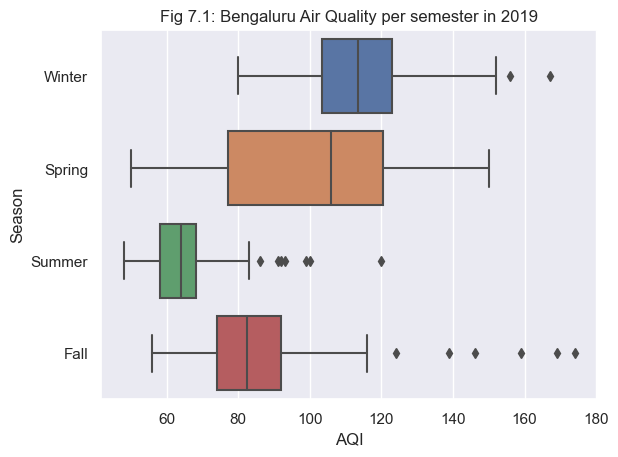

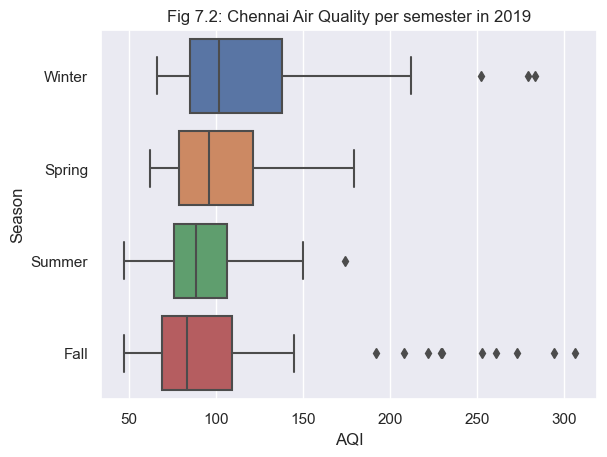

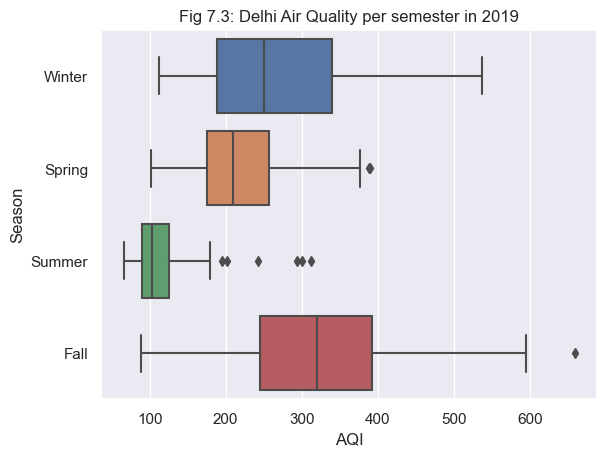

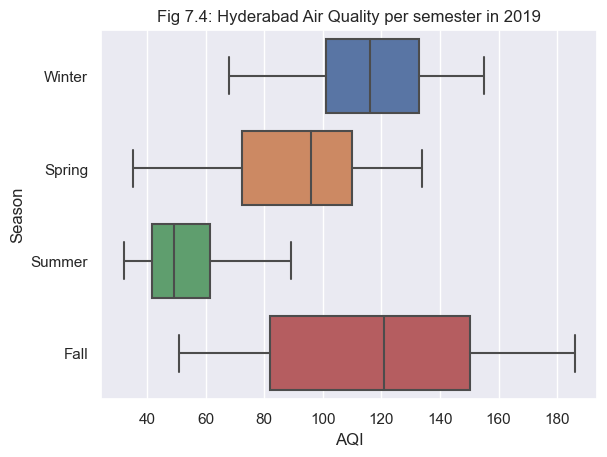

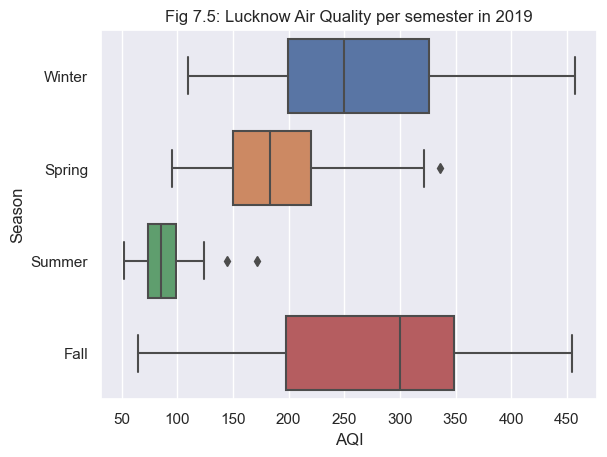

Bengaluru AQI 2019 Table summary:
        index    AQI  Month
count   365.0  365.0  365.0
mean   1543.0   92.0    7.0
std     106.0   27.0    3.0
min    1361.0   48.0    1.0
25%    1452.0   68.0    4.0
50%    1543.0   89.0    7.0
75%    1634.0  111.0   10.0
max    1725.0  174.0   12.0

Chennai AQI 2019 Table summary:
        index    AQI  Month
count   365.0  365.0  365.0
mean   3421.0  103.0    7.0
std     106.0   42.0    3.0
min    3239.0   47.0    1.0
25%    3330.0   77.0    4.0
50%    3421.0   92.0    7.0
75%    3512.0  115.0   10.0
max    3603.0  306.0   12.0

Delhi AQI 2019 Table summary:
        index    AQI  Month
count   365.0  365.0  365.0
mean   5419.0  232.0    7.0
std     106.0  118.0    3.0
min    5237.0   66.0    1.0
25%    5328.0  131.0    4.0
50%    5419.0  209.0    7.0
75%    5510.0  305.0   10.0
max    5601.0  659.0   12.0

Hyderabad AQI 2019 Table summary:
        index    AQI  Month
count   365.0  365.0  365.0
mean   7296.0   94.0    7.0
std     106.0   37.0    3.0

In [20]:
sns.boxplot(data=benY2k19,x='AQI',y='Season',orient='h').set(title='Fig 7.1: Bengaluru Air Quality per semester in 2019')
plt.show()

sns.boxplot(data=cheY2k19,x='AQI',y='Season',orient='h').set(title='Fig 7.2: Chennai Air Quality per semester in 2019')
plt.show()

sns.boxplot(data=delY2k19,x='AQI',y='Season',orient='h').set(title='Fig 7.3: Delhi Air Quality per semester in 2019')
plt.show()

sns.boxplot(data=hydY2k19,x='AQI',y='Season',orient='h').set(title='Fig 7.4: Hyderabad Air Quality per semester in 2019')
plt.show()

sns.boxplot(data=lucY2k19,x='AQI',y='Season',orient='h').set(title='Fig 7.5: Lucknow Air Quality per semester in 2019')
plt.show()

print(f"Bengaluru AQI 2019 Table summary:\n{benY2k19.describe().round()}\n")
print(f"Chennai AQI 2019 Table summary:\n{cheY2k19.describe().round()}\n")
print(f"Delhi AQI 2019 Table summary:\n{delY2k19.describe().round()}\n")
print(f"Hyderabad AQI 2019 Table summary:\n{hydY2k19.describe().round()}\n")
print(f"Lucknow AQI 2019 Table summary:\n{hydY2k19.describe().round()}\n")

If we look at the averages and the range of values in the box plots above and tables above. Then summer months tend to be lowest for all cities and fall and winter is greater for all cities. Therefore, yes in fact this establishes that there is a connection between air quality and the change in season. We can also a side by side comparison for all cities for good measure.

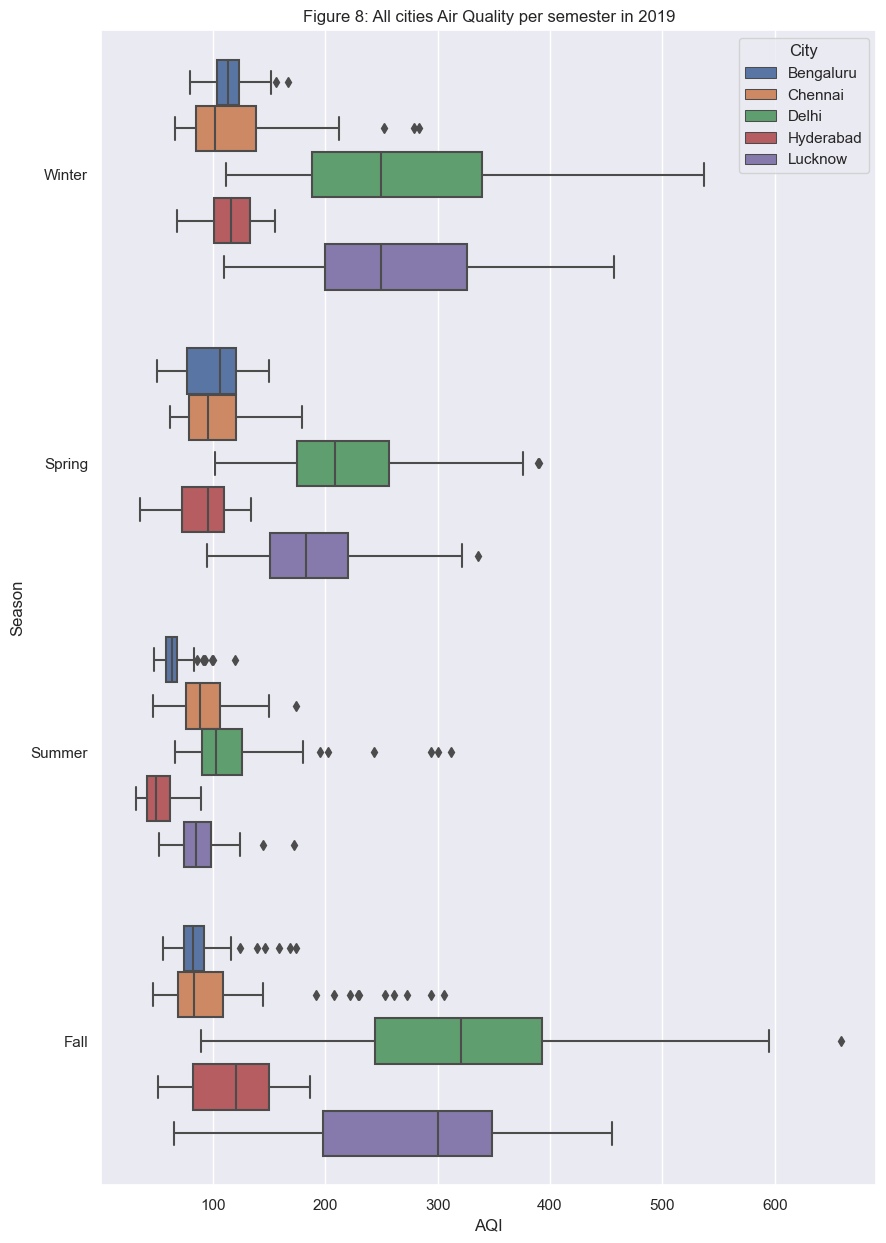

All cities AQI 2019 Table summary:
        index     AQI   Month
count  1825.0  1825.0  1825.0
mean   5373.0   145.0     7.0
std    2713.0    96.0     3.0
min    1361.0    32.0     1.0
25%    3330.0    80.0     4.0
50%    5419.0   110.0     7.0
75%    7387.0   175.0    10.0
max    9369.0   659.0    12.0



In [21]:
with pd.option_context('mode.chained_assignment', None): # since conditions are a bit different,we can't use the function above to create a data frame that includes all cities, so has to be done manually.

    allY2k19 =  df.loc[(df['Year'] == 2019)]
    allY2k19.drop(allY2k19.columns.difference(['City','AQI','Month']),inplace=True,axis=1)
    allY2k19.sort_values(by=['Month','City'],ascending=[True,True],inplace=True)
    allY2k19.reset_index(inplace=True)
    conditions = [
        allY2k19['Month'].between(1,3),
        allY2k19['Month'].between(4,6),
        allY2k19['Month'].between(7,9),
        allY2k19['Month'].between(10,12),
    ]
    assigns = ['Winter','Spring','Summer','Fall']

    allY2k19['Season'] = np.select(conditions,assigns,default=0)
    plt.figure(figsize=(10,15))
    sns.boxplot(data=allY2k19,x='AQI',y='Season',orient='h',hue='City',).set(title='Figure 8: All cities Air Quality per semester in 2019')
    plt.show()

    print(f"All cities AQI 2019 Table summary:\n{allY2k19.describe().round()}\n")

## Discussion

### Summary of analyses
In this assignment, we explored the relationship between air quality (AQI) with respect to seasonal change (time). Our sample was five major cities in India (Bengaluru, Chennai, Delhi, Hyderabad and Lucknow), with daily averages for AQI from 2015 to 2020.

We learned from a frequency histogram right-skewed distribution that most values fall around 80 to 160 AQI, where 160 is the mean average of the distribution. The lowest possible AQI is 20, and the maximum AQI is 737, which is an outlier. Furthermore, in figure 3, we displayed the mean AQIs by city; Delhi was among the highest, and Bengaluru was among the lowest. A pattern was established to show that northern cities of India tend to have a higher AQI than southern cities. This was further supported by frequency count plots of each city's AQI bucket.

Time analysis was conducted to analyze and establish a pattern relevant to the research question. At first, we looked at the monthly averages for each month in separate charts for each year (Figure 5.x). From intuition, a pattern was established as observations showed that the means tend to be lower for summer months than for fall or winter months. To further explore this pattern and see the bigger picture. We created a time series analysis (Figures 6.x) that showed that the AQI was indeed changing periodically, almost in a sinusoidal pattern. To support this trend, we focused on a subset of the data, where we took a look at different semesters in the year 2019 for each city (Figures 7.x).

Moreover, the data did show to be less for summer than other months and winters to be generally higher. Additionally, the range of summer is smaller than winter or fall. Finally, in figure 8, we showed the box plots of all the cities side by side in one figure to show the bigger picture.

### Conclusion
In conclusion, this assignment aimed to explore the research question: How is Air Quality Index affected with respect to the change in seasons (time)? From our analyses, we were to establish that there is, in fact, a relationship between air quality and changes in season. This does not imply that change in season is a direct cause of change in air quality because air and weather are highly complex and dynamic ecosystems. However, as mentioned in the introduction, many people attribute poor air quality to human activities such as stubble burning and industrial activities.

## References:
1. Wikipedia article about air pollution in India - https://en.wikipedia.org/wiki/Air_pollution_in_India
2. How AQI is calculated: https://app.cpcbccr.com/ccr_docs/How_AQI_Calculated.pdf
3. Data set - https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
4. Pandas for data analysis
5. Numpy for data analysis
6. Seaborn for data visualization
7. Matplotlib for data visualization
8. Missingno for data visualization for cleaning data